In [2]:
import matplotlib.pyplot as plt 
import numpy as np 

## Derivative at $x=0.1$ of $f(x) = cos(x).$

In [4]:
-np.sin(0.1)

-0.09983341664682815

Text(0, 0.5, 'error with forward difference')

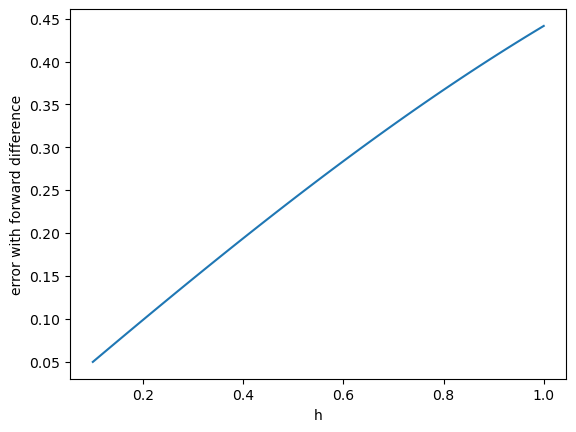

In [110]:
def forward(h):
    f = (np.cos(0.1+h)-np.cos(0.1))/h
    return f

def central(h):
    f = (np.cos(0.1+h)-np.cos(0.1-h))/ (2 * h) 
    return f

def eta(h):
    f = -central(h)/3 + 4 * central(h/2)/3
    return f

h = np.linspace(0.1, 1., 50)
plt.plot(h, -np.sin(0.1)-forward(h))
plt.xlabel('h')
plt.ylabel('error with forward difference')

We have a line, that means the error is of order $h^2$. 

Text(0, 0.5, 'error with central difference')

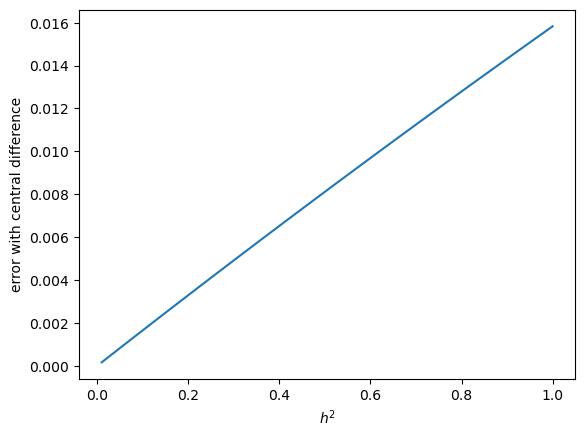

In [122]:
plt.plot(h **2 , abs(-np.sin(0.1) - central(h)))
plt.xlabel('$h^2$')
plt.ylabel('error with central difference')

Text(0, 0.5, 'error using $\\eta(h)$')

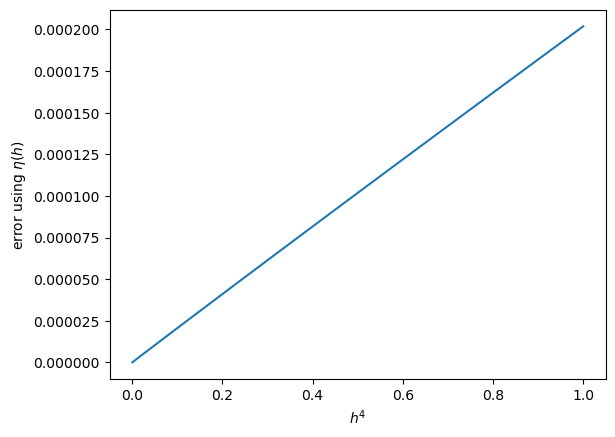

In [108]:
plt.plot(h ** 4, abs(-np.sin(0.1)-eta(h)))
plt.xlabel('$h^4$')
plt.ylabel('error using $\eta(h)$')

## Compute the second derivative of $f (x) = cos(x)$. 

We are computing the second derivative taking $x=0.1$

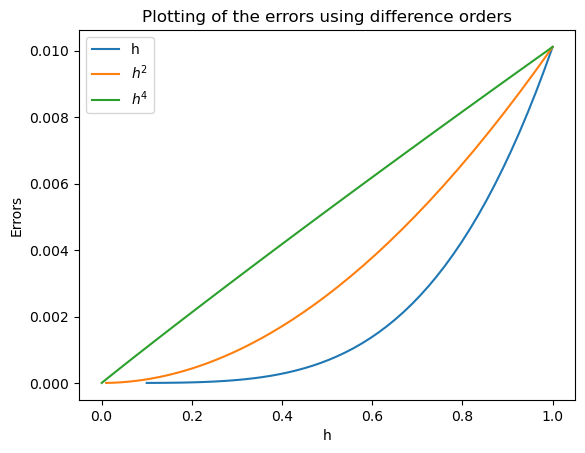

In [121]:
def second(h):
    return (-np.cos(0.1 + 2 * h)+16 *np.cos(0.1 + h) -30 * np.cos(0.1) + 16 * np.cos(0.1-h) - np.cos(0.1 - 2 * h))/(12 * h ** 2)

plt.plot(h, abs(-np.cos(0.1) - second(h)), label = 'h')
plt.plot(h ** 2, abs(-np.cos(0.1) - second(h)), label = '$h^2$')
plt.plot(h ** 4, abs(-np.cos(0.1) - second(h)), label = '$h^4$')
plt.xlabel('h')
plt.ylabel('Errors')
plt.title('Plotting of the errors using difference orders')
plt.legend()

The error is of order $h^4$ because we obtained a straigh line for that case.

## Richardson interpolation

In [86]:
M = np.zeros((5, 5))
x = 1
h = 1
def central1(h):
    f = (np.exp(-(1.+h) ** 2)-np.exp(-(1.-h) ** 2))/ (2 * h) 
    return f
M[0, 0] = central1(h)
M[1, 0] = central1(h/2)
M[2, 0] = central1(h/4)
M[3, 0] = central1(h/8)
M[4, 0] = central1(h/16)
for i in range(1, 5):
    M[i, 1] = (4/3) * M[i, 0] - M[i-1, 0]/3
    for j in range(1, 5):
        M[i, j] = (4 ** j/(4 ** j -1)) * M[i, j-1] - (1/(4 **j -1)) * M[i-1, j-1]
M[4, 4]

-0.7357588840355365

In [124]:
-2 * 1. * np.exp(-1. **2)

-0.7357588823428847